Simulation progress: 100%|████████████████████████████████████| 1200/1200 [00:01<00:00, 1077.26it/s]


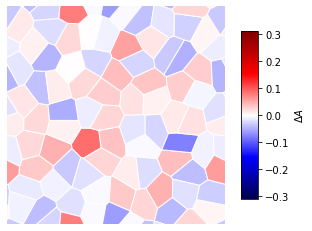

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('..'))
import synmorph as sm

tissue_params = {"L": 9,
                 "A0": 1,
                 "P0": 3.81,
                 "kappa_A": 1,
                 "kappa_P": 0.1,
                 "W": np.array(((0, 0.0762), (0.0762, 0))),
                 "a": 0,
                 "k": 0}
active_params = {"v0": 1e-1,
                 "Dr": 1e-1}
init_params = {"init_noise": 0.005,
               "c_type_proportions": (1.0,0)} # ?
run_options = {"equiangulate": True,
               "equi_nkill": 3}
simulation_params = {"dt": 0.025,
                     "tfin": 30,
                     "tskip": 10,
                     "grn_sim": None}
save_options = {"save": "last",
                "result_dir": "results",
                "name": "dP_example",
                "compressed": True}
sim = sm.simulation(tissue_params=tissue_params,
                    active_params=active_params,
                    init_params=init_params,
                    simulation_params=simulation_params,
                    run_options=run_options,
                    save_options=save_options)
sim.simulate(progress_bar=True)

sim.animate_property(tissue_property="dA", # dP = change in perimeter, dA = change in area (?)
                     n_frames=20,
                     cmap=plt.cm.seismic,
                     vmid=0, # mid value
                     file_name="dP_animation")